In [1]:
#import sampleCleaningTransform
from fmri_sample_cleaning_transform import get_affected_samples
from fmri_cleaner import remove_samples
import os
import numpy as np
import mvpa2
import nibabel
import pickle
import gzip
from mvpa2.suite import *
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline
#from sampleCleaningTransform import printSomething

E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\scipy\_lib\decorator.py:205: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  first = inspect.getargspec(caller)[0][0]  # first arg
E:\Anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1502: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, varkw, defaults = inspect.getargspec(jac.__init__)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:636: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  sign = inspect.getargspec(self._stats)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_in

 * Please note: warnings are printed only once, but underlying problem might occur many times *


E:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
E:\Anaconda3\lib\site-packages\scipy\_lib\decorator.py:205: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  first = inspect.getargspec(caller)[0][0]  # first arg
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\datasets\sources\skl_data.py:32: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argnames, varargs, varkw, defaults = inspect.getargspec(fx)
E:\Anaconda3\lib\site-packages\pandas\__init__.py:7: DeprecationWarning: bad escape \s
  from pandas import hashtable, tslib, lib
E:\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:94: DeprecationWarning: inspect

In [2]:
# get the location of the files
trajectory_path = "..\\data\\story\\smoothedTrajectoriesDifferentWindowSizes\\smoothTrajRawValenceMean_win50.pkl"
subject_timeline_path = "..\\data\\plosone\\subject_3.mat"
bold_fname = os.path.join('..', 'data', 'qub', '4Dw.nii')
mask_fname = os.path.join('..', 'data', 'qub', 'struct', 'final_mask_w.hdr')

In [3]:
ds_removal_transform = get_affected_samples(trajectory_path, subject_timeline_path)

In [4]:
ds = remove_samples(bold_fname, mask_fname, ds_removal_transform)

In [5]:
len(ds)

1295

In [6]:
#get the trajectory
with open('..\\data\\story\\smoothedTrajectoriesDifferentWindowSizes\\smoothTrajRawValenceMean_win500.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    original_trajectory = u.load()

In [7]:
#downsample the trajectory to fit match the number of fMRI sample
resampled_trajectory = resample(original_trajectory, len(ds.samples))

In [45]:
ds.sa['targets'] = resampled_trajectory
#detrender = PolyDetrendMapper(polyord=1)
#ds = ds.get_mapped(detrender)
#training_set = ds[400 : ]
#test_set = ds[ : 400]

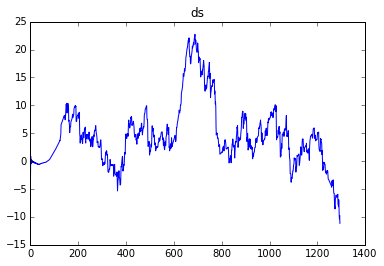

In [116]:
plt.plot(ds.sa.targets)
plt.title('ds')
plt.show()

In [117]:
set_type = []
test_start_pos = 800
test_end_pos = 900
for i in range(0, len(ds)):
    if i >= test_start_pos and i <= test_end_pos:
        set_type.append("test")
    else:
        set_type.append("train")
        
ds.sa['set_type'] = set_type

In [118]:
training_set = ds[ds.sa.set_type == 'train']
test_set = ds[ds.sa.set_type == 'test']

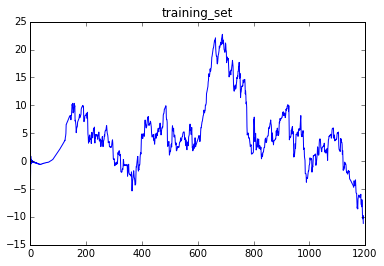

In [119]:
plt.plot(training_set.sa.targets)
plt.title('training_set')
plt.show()

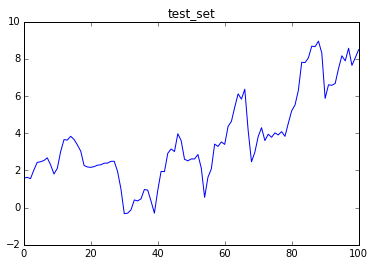

In [120]:
plt.plot(test_set.sa.targets)
plt.title('test_set')
plt.show()

In [137]:
clf_1 = SKLLearnerAdapter(DecisionTreeRegressor(max_depth=20))

In [138]:
clf_1.train(training_set)

In [139]:
predictions = clf_1.predict(test_set)

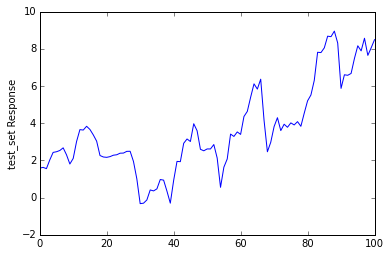

In [140]:
plt.plot(test_set.sa.targets)
plt.ylabel('test_set Response')
plt.show()

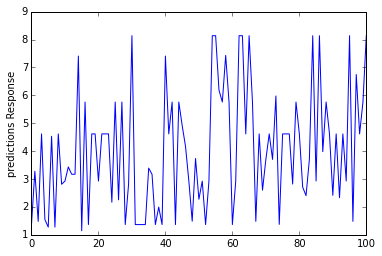

In [141]:
plt.plot(predictions)
plt.ylabel('predictions Response')
plt.show()

In [142]:
len(resampled_trajectory)

1295

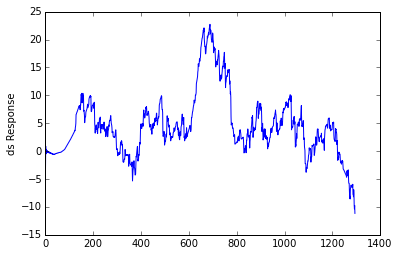

In [143]:
plt.plot(ds.sa.targets)
plt.ylabel('ds Response')
plt.show()

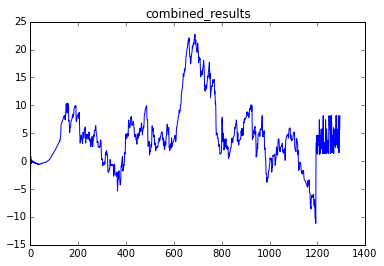

In [144]:
combined_results = np.concatenate((training_set.sa.targets, predictions), axis=0)
plt.plot(combined_results)
plt.title('combined_results')
plt.show()

In [145]:
clf_2 = kNN(k=3, dfx=one_minus_correlation, voting='majority')

In [146]:
clf_2.train(training_set)

In [147]:
predictions2 = clf_2.predict(test_set.samples)

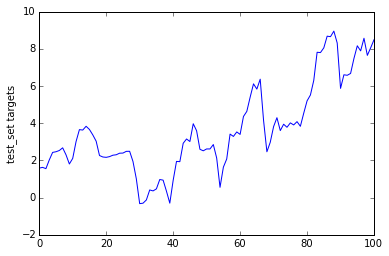

In [148]:
plt.plot(test_set.sa.targets)
plt.ylabel('test_set targets')
plt.show()

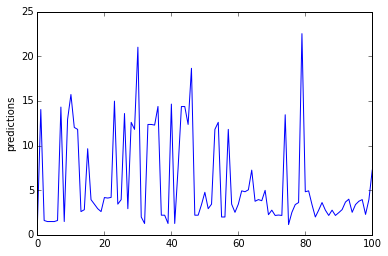

In [149]:
plt.plot(predictions2)
plt.ylabel('predictions')
plt.show()